In [367]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [324]:
df = pd.read_csv('wood_removal_cubic_meters.csv')
df.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,2160000.0,2210000.0,2290000.0,2400000.0,2510000.0,2610000.0,2720000.0,2810000.0,2880000.0,2970000.0,3040000.0,3070000.0,3110000.0,3150000.0,3190000.0,3230000.0,3260000.0,3290000.0,3320000.0,3360000.0,3400000.0,3400000.0
1,Albania,2080000.0,2560000.0,2560000.0,595000.0,409000.0,409000.0,409000.0,409000.0,27700.0,230000.0,447000.0,265000.0,305000.0,296000.0,296000.0,296000.0,296000.0,430000.0,430000.0,430000.0,430000.0,430000.0
2,Algeria,124000.0,172000.0,139000.0,239000.0,166000.0,194000.0,190000.0,203000.0,222000.0,202000.0,186000.0,130000.0,121000.0,164000.0,184000.0,141000.0,141000.0,152000.0,121000.0,139000.0,135000.0,119000.0
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Angola,3190000.0,3280000.0,3380000.0,3670000.0,3750000.0,3780000.0,3840000.0,3930000.0,4050000.0,4170000.0,4260000.0,4340000.0,4420000.0,4500000.0,4580000.0,4670000.0,4750000.0,4840000.0,4920000.0,5010000.0,5110000.0,5200000.0


In [325]:
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176
country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Dem. Rep.","Congo, Rep.",Costa Rica,Cote d'Ivoire,Cuba,Cyprus,Czech Republic,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kenya,Kiribati,Kuwait,Lao,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Mali,Malta,Mauritania,Mauritius,Mexico,"Micronesia, Fed. Sts.",Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Korea,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,St. Lucia,St. Vincent and the Grenadines,Suriname,Swaziland,Sweden,Switzerland,Syria,Tajikistan,Tanzania,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1990,2.16e+06,2.08e+06,124000,0,3.19e+06,1.02e+07,NaN,2.08e+07,1.57e+07,NaN,144000,4290,2.84e+07,5660,NaN,6.35e+06,188000,5.85e+06,3.9e+06,2.29e+06,NaN,687000,2.66e+08,4.09e+06,9.64e+06,6.46e+06,1.18e+07,1.08e+07,1.63e+08,99800,3.48e+06,5.17e+06,2.21e+07,5.11e+07,1.04e+07,145000,4.72e+07,2.57e+06,4.53e+06,1.11e+07,3.2e+06,62800,1.28e+07,1.76e+06,203000,8600,NaN,7.18e+06,1.41e+07,3.74e+06,634000,NaN,2.34e+06,NaN,4.32e+07,6.26e+07,2.09e+06,521000,343000,8.47e+07,1.43e+07,2.49e+06,NaN,1.04e+07,1.99e+06,1.07e+06,1.87e+06,0,9.3e+06,5.5e+06,NaN,2.48e+08,NaN,1.22e+06,89900,1.63e+06,113000,7.97e+06,1.06e+06,2.97e+07,138000,1.85e+07,2030,21100,6.08e+06,NaN,74200,1.26e+06,4.58e+06,682000,NaN,NaN,NaN,8.19e+06,6.04e+06,4.53e+07,4.3e+06,0,1.15e+06,27100,8.16e+06,0,NaN,1.5e+06,NaN,7.14e+06,NaN,35800,678000,1.3e+07,1.42e+06,1.31e+07,5.93e+06,5.98e+06,5.92e+07,4.96e+06,1.17e+07,14800,2.37e+07,1.52e+06,1.79e+06,8.34e+06,1.07e+06,2.01e+07,2e+07,1.12e+07,2670,1.26e+07,3.25e+08,6.39e+06,131000,0,88500,119000,455000,3.66e+06,10100,4.83e+06,NaN,5.28e+06,NaN,580000,6.37e+06,2.82e+07,1.52e+06,NaN,1.56e+07,7.01e+06,8980,9200,116000,1.68e+06,5.29e+07,6.33e+06,49600,NaN,2.05e+07,NaN,4.77e+06,4470,90000,260000,1.58e+07,NaN,3.1e+07,NaN,11600,6.35e+06,5.09e+08,3.91e+06,NaN,63200,NaN,3.12e+07,173000,7.12e+06,6.9e+06
1991,2.21e+06,2.56e+06,172000,0,3.28e+06,1.04e+07,NaN,2.04e+07,1.15e+07,NaN,144000,4410,2.86e+07,5690,NaN,2.45e+06,188000,5.93e+06,3.93e+06,2.4e+06,NaN,689000,2.18e+08,3.65e+06,9.77e+06,6.53e+06,1.19e+07,1.1e+07,1.61e+08,103000,3.43e+06,5.27e+06,2.45e+07,5.29e+07,1.05e+07,150000,4.98e+07,2.15e+06,4.48e+06,1.08e+07,3.3e+06,53800,1.09e+07,1.66e+06,213000,8500,NaN,6.79e+06,1.44e+07,4.68e+06,589000,NaN,3.5e+

In [326]:
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Dem. Rep.","Congo, Rep.",Costa Rica,Cote d'Ivoire,Cuba,Cyprus,Czech Republic,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kenya,Kiribati,Kuwait,Lao,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Mali,Malta,Mauritania,Mauritius,Mexico,"Micronesia, Fed. Sts.",Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Korea,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,St. Lucia,St. Vincent and the Grenadines,Suriname,Swaziland,Sweden,Switzerland,Syria,Tajikistan,Tanzania,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1990,2.16e+06,2.08e+06,124000,0,3.19e+06,1.02e+07,NaN,2.08e+07,1.57e+07,NaN,144000,4290,2.84e+07,5660,NaN,6.35e+06,188000,5.85e+06,3.9e+06,2.29e+06,NaN,687000,2.66e+08,4.09e+06,9.64e+06,6.46e+06,1.18e+07,1.08e+07,1.63e+08,99800,3.48e+06,5.17e+06,2.21e+07,5.11e+07,1.04e+07,145000,4.72e+07,2.57e+06,4.53e+06,1.11e+07,3.2e+06,62800,1.28e+07,1.76e+06,203000,8600,NaN,7.18e+06,1.41e+07,3.74e+06,634000,NaN,2.34e+06,NaN,4.32e+07,6.26e+07,2.09e+06,521000,343000,8.47e+07,1.43e+07,2.49e+06,NaN,1.04e+07,1.99e+06,1.07e+06,1.87e+06,0,9.3e+06,5.5e+06,NaN,2.48e+08,NaN,1.22e+06,89900,1.63e+06,113000,7.97e+06,1.06e+06,2.97e+07,138000,1.85e+07,2030,21100,6.08e+06,NaN,74200,1.26e+06,4.58e+06,682000,NaN,NaN,NaN,8.19e+06,6.04e+06,4.53e+07,4.3e+06,0,1.15e+06,27100,8.16e+06,0,NaN,1.5e+06,NaN,7.14e+06,NaN,35800,678000,1.3e+07,1.42e+06,1.31e+07,5.93e+06,5.98e+06,5.92e+07,4.96e+06,1.17e+07,14800,2.37e+07,1.52e+06,1.79e+06,8.34e+06,1.07e+06,2.01e+07,2e+07,1.12e+07,2670,1.26e+07,3.25e+08,6.39e+06,131000,0,88500,119000,455000,3.66e+06,10100,4.83e+06,NaN,5.28e+06,NaN,580000,6.37e+06,2.82e+07,1.52e+06,NaN,1.56e+07,7.01e+06,8980,9200,116000,1.68e+06,5.29e+07,6.33e+06,49600,NaN,2.05e+07,NaN,4.77e+06,4470,90000,260000,1.58e+07,NaN,3.1e+07,NaN,11600,6.35e+06,5.09e+08,3.91e+06,NaN,63200,NaN,3.12e+07,173000,7.12e+06,6.9e+06
1991,2.21e+06,2.56e+06,172000,0,3.28e+06,1.04e+07,NaN,2.04e+07,1.15e+07,NaN,144000,4410,2.86e+07,5690,NaN,2.45e+06,188000,5.93e+06,3.93e+06,2.4e+06,NaN,689000,2.18e+08,3.65e+06,9.77e+06,6.53e+06,1.19e+07,1.1e+07,1.61e+08,103000,3.43e+06,5.27e+06,2.45e+07,5.29e+07,1.05e+07,150000,4.98e+07,2.15e+06,4.48e+06,1.08e+07,3.3e+06,53800,1.09e+07,1.66e+06,213000,8500,NaN,6.79e+06,1.44e+07,4.68e+06,589000,NaN,3.5e+06,NaN,3.49e+07,6.3e+07,1.78e+06,549000,327000,3.36e+07,1.24e+07,2.55e+06,NaN,1.09e+07,2.02e+06,1.06e+06,1.9e+06,0,9.28e+06,5.31e+06,NaN,2.52e+08,NaN,1.5e+06,96400,1.67e+06,113000,8.33e+06,917000,2.84e+07,146000,1.9e+07,2060,24000,6.32e+06,NaN,74000,1.33e+06,4.09e+06,696000,NaN,NaN,NaN,8.54e+06,6e+06,4.53e+07,4.44e+06,0,1.18e+06,17300,7.69e+06,1740,NaN,996000,NaN,7.67e+06,NaN,35700,686000,1.3e+07,1.12e+06,1.38e+07,5.92e+06,6.18e+06,6e+07,5.08e+06,1.07e+07,15500,2.38e+07,1.48e+06,1.66e+06,8.55e+06,922000,1.89e+07,1.94e+07,1.08e+07,2870,1.3e+07,3.55e+08,6.39e+06,131000,0,90500,122000,519000,3.5

In [327]:
df = df.reset_index()
df.rename(index=str, columns={'index':'datetime'},inplace=True)

df.head()

country,datetime,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Dem. Rep.","Congo, Rep.",Costa Rica,Cote d'Ivoire,Cuba,Cyprus,Czech Republic,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kenya,Kiribati,Kuwait,Lao,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Mali,Malta,Mauritania,Mauritius,Mexico,"Micronesia, Fed. Sts.",Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Korea,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,St. Lucia,St. Vincent and the Grenadines,Suriname,Swaziland,Sweden,Switzerland,Syria,Tajikistan,Tanzania,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1990,2.16e+06,2.08e+06,124000,0,3.19e+06,1.02e+07,NaN,2.08e+07,1.57e+07,NaN,144000,4290,2.84e+07,5660,NaN,6.35e+06,188000,5.85e+06,3.9e+06,2.29e+06,NaN,687000,2.66e+08,4.09e+06,9.64e+06,6.46e+06,1.18e+07,1.08e+07,1.63e+08,99800,3.48e+06,5.17e+06,2.21e+07,5.11e+07,1.04e+07,145000,4.72e+07,2.57e+06,4.53e+06,1.11e+07,3.2e+06,62800,1.28e+07,1.76e+06,203000,8600,NaN,7.18e+06,1.41e+07,3.74e+06,634000,NaN,2.34e+06,NaN,4.32e+07,6.26e+07,2.09e+06,521000,343000,8.47e+07,1.43e+07,2.49e+06,NaN,1.04e+07,1.99e+06,1.07e+06,1.87e+06,0,9.3e+06,5.5e+06,NaN,2.48e+08,NaN,1.22e+06,89900,1.63e+06,113000,7.97e+06,1.06e+06,2.97e+07,138000,1.85e+07,2030,21100,6.08e+06,NaN,74200,1.26e+06,4.58e+06,682000,NaN,NaN,NaN,8.19e+06,6.04e+06,4.53e+07,4.3e+06,0,1.15e+06,27100,8.16e+06,0,NaN,1.5e+06,NaN,7.14e+06,NaN,35800,678000,1.3e+07,1.42e+06,1.31e+07,5.93e+06,5.98e+06,5.92e+07,4.96e+06,1.17e+07,14800,2.37e+07,1.52e+06,1.79e+06,8.34e+06,1.07e+06,2.01e+07,2e+07,1.12e+07,2670,1.26e+07,3.25e+08,6.39e+06,131000,0,88500,119000,455000,3.66e+06,10100,4.83e+06,NaN,5.28e+06,NaN,580000,6.37e+06,2.82e+07,1.52e+06,NaN,1.56e+07,7.01e+06,8980,9200,116000,1.68e+06,5.29e+07,6.33e+06,49600,NaN,2.05e+07,NaN,4.77e+06,4470,90000,260000,1.58e+07,NaN,3.1e+07,NaN,11600,6.35e+06,5.09e+08,3.91e+06,NaN,63200,NaN,3.12e+07,173000,7.12e+06,6.9e+06
1,1991,2.21e+06,2.56e+06,172000,0,3.28e+06,1.04e+07,NaN,2.04e+07,1.15e+07,NaN,144000,4410,2.86e+07,5690,NaN,2.45e+06,188000,5.93e+06,3.93e+06,2.4e+06,NaN,689000,2.18e+08,3.65e+06,9.77e+06,6.53e+06,1.19e+07,1.1e+07,1.61e+08,103000,3.43e+06,5.27e+06,2.45e+07,5.29e+07,1.05e+07,150000,4.98e+07,2.15e+06,4.48e+06,1.08e+07,3.3e+06,53800,1.09e+07,1.66e+06,213000,8500,NaN,6.79e+06,1.44e+07,4.68e+06,589000,NaN,3.5e+06,NaN,3.49e+07,6.3e+07,1.78e+06,549000,327000,3.36e+07,1.24e+07,2.55e+06,NaN,1.09e+07,2.02e+06,1.06e+06,1.9e+06,0,9.28e+06,5.31e+06,NaN,2.52e+08,NaN,1.5e+06,96400,1.67e+06,113000,8.33e+06,917000,2.84e+07,146000,1.9e+07,2060,24000,6.32e+06,NaN,74000,1.33e+06,4.09e+06,696000,NaN,NaN,NaN,8.54e+06,6e+06,4.53e+07,4.44e+06,0,1.18e+06,17300,7.69e+06,1740,NaN,996000,NaN,7.67e+06,NaN,35700,686000,1.3e+07,1.12e+06,1.38e+07,5.92e+06,6.18e+06,6e+07,5.08e+06,1.07e+07,15500,2.38e+07,1.48e+06,1.66e+06,8.55e+06,922000,1.89e+07,1.94e+07,1.08e+07,2870,1.3e+07,3.55e+08,6.39e+06,131000,0,90500,1220

In [328]:
df['datetime'] = pd.to_datetime(df['datetime'])

df = df.set_index('datetime')

df.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Dem. Rep.","Congo, Rep.",Costa Rica,Cote d'Ivoire,Cuba,Cyprus,Czech Republic,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kenya,Kiribati,Kuwait,Lao,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Mali,Malta,Mauritania,Mauritius,Mexico,"Micronesia, Fed. Sts.",Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Korea,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,St. Lucia,St. Vincent and the Grenadines,Suriname,Swaziland,Sweden,Switzerland,Syria,Tajikistan,Tanzania,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-01,2.16e+06,2.08e+06,124000,0,3.19e+06,1.02e+07,NaN,2.08e+07,1.57e+07,NaN,144000,4290,2.84e+07,5660,NaN,6.35e+06,188000,5.85e+06,3.9e+06,2.29e+06,NaN,687000,2.66e+08,4.09e+06,9.64e+06,6.46e+06,1.18e+07,1.08e+07,1.63e+08,99800,3.48e+06,5.17e+06,2.21e+07,5.11e+07,1.04e+07,145000,4.72e+07,2.57e+06,4.53e+06,1.11e+07,3.2e+06,62800,1.28e+07,1.76e+06,203000,8600,NaN,7.18e+06,1.41e+07,3.74e+06,634000,NaN,2.34e+06,NaN,4.32e+07,6.26e+07,2.09e+06,521000,343000,8.47e+07,1.43e+07,2.49e+06,NaN,1.04e+07,1.99e+06,1.07e+06,1.87e+06,0,9.3e+06,5.5e+06,NaN,2.48e+08,NaN,1.22e+06,89900,1.63e+06,113000,7.97e+06,1.06e+06,2.97e+07,138000,1.85e+07,2030,21100,6.08e+06,NaN,74200,1.26e+06,4.58e+06,682000,NaN,NaN,NaN,8.19e+06,6.04e+06,4.53e+07,4.3e+06,0,1.15e+06,27100,8.16e+06,0,NaN,1.5e+06,NaN,7.14e+06,NaN,35800,678000,1.3e+07,1.42e+06,1.31e+07,5.93e+06,5.98e+06,5.92e+07,4.96e+06,1.17e+07,14800,2.37e+07,1.52e+06,1.79e+06,8.34e+06,1.07e+06,2.01e+07,2e+07,1.12e+07,2670,1.26e+07,3.25e+08,6.39e+06,131000,0,88500,119000,455000,3.66e+06,10100,4.83e+06,NaN,5.28e+06,NaN,580000,6.37e+06,2.82e+07,1.52e+06,NaN,1.56e+07,7.01e+06,8980,9200,116000,1.68e+06,5.29e+07,6.33e+06,49600,NaN,2.05e+07,NaN,4.77e+06,4470,90000,260000,1.58e+07,NaN,3.1e+07,NaN,11600,6.35e+06,5.09e+08,3.91e+06,NaN,63200,NaN,3.12e+07,173000,7.12e+06,6.9e+06
1991-01-01,2.21e+06,2.56e+06,172000,0,3.28e+06,1.04e+07,NaN,2.04e+07,1.15e+07,NaN,144000,4410,2.86e+07,5690,NaN,2.45e+06,188000,5.93e+06,3.93e+06,2.4e+06,NaN,689000,2.18e+08,3.65e+06,9.77e+06,6.53e+06,1.19e+07,1.1e+07,1.61e+08,103000,3.43e+06,5.27e+06,2.45e+07,5.29e+07,1.05e+07,150000,4.98e+07,2.15e+06,4.48e+06,1.08e+07,3.3e+06,53800,1.09e+07,1.66e+06,213000,8500,NaN,6.79e+06,1.44e+07,4.68e+06,589000,NaN,3.5e+06,NaN,3.49e+07,6.3e+07,1.78e+06,549000,327000,3.36e+07,1.24e+07,2.55e+06,NaN,1.09e+07,2.02e+06,1.06e+06,1.9e+06,0,9.28e+06,5.31e+06,NaN,2.52e+08,NaN,1.5e+06,96400,1.67e+06,113000,8.33e+06,917000,2.84e+07,146000,1.9e+07,2060,24000,6.32e+06,NaN,74000,1.33e+06,4.09e+06,696000,NaN,NaN,NaN,8.54e+06,6e+06,4.53e+07,4.44e+06,0,1.18e+06,17300,7.69e+06,1740,NaN,996000,NaN,7.67e+06,NaN,35700,686000,1.3e+07,1

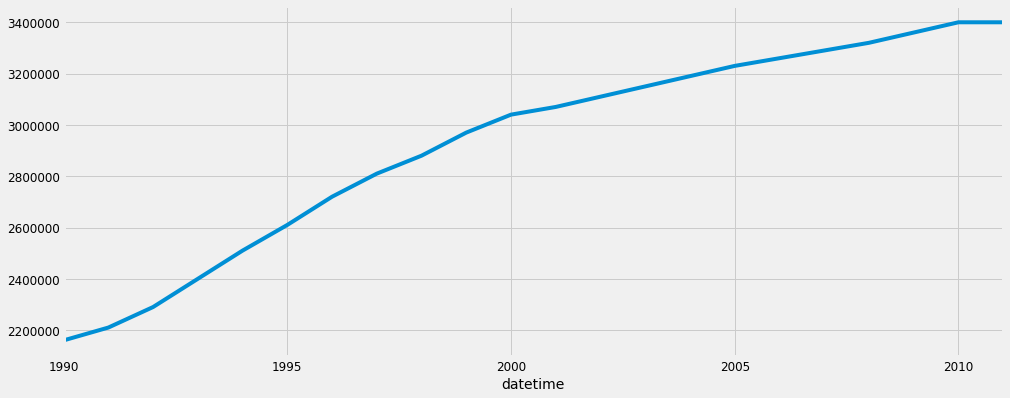

In [329]:
df['Afghanistan'].plot(figsize=(15,6));

In [458]:
df_pop = pd.read_csv('population_dnesity.csv', error_bad_lines=False)
df_env = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding = "ISO-8859-1")
df_lan = pd.read_csv('land_use_over_the_long_term_ourworldindata.csv')


df_pop.shape, df_env.shape, df_lan.shape

((264, 64), (9248, 65), (1036, 6))

In [459]:
df_pop2 = df_pop.T


In [461]:
df_pop2.drop(df_pop2.index[[1,2,3,4]], inplace=True)

new_header = df_pop2.iloc[0]
df_pop2 = df_pop2[1:]
df_pop2.columns = new_header
df_pop2.head()

df_pop2 = df_pop2.reset_index()
df_pop2.rename(index=str, columns={'index':'datetime'},inplace=True)

df_pop2['datetime']
df_pop2 = df_pop2.set_index('datetime')



df_pop.head(35)



,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,307.988889,312.361111,314.972222,316.844444,318.666667,320.638889,322.527778,324.366667,326.255556,328.127778,330.222222,332.444444,334.683333,336.266667,336.983333,336.588889,335.366667,333.905556,333.222222,333.866667,336.483333,340.805556,345.561111,349.088889,350.144444,348.022222,343.516667,339.327778,339.066667,345.272222,359.011111,379.083333,402.800000,426.111111,446.244444,462.222222,474.727778,484.872222,494.472222,504.738889,516.100000,527.733333,538.983333,548.538889,555.727778,560.177778,562.333333,563.072222,563.627778,564.827778,566.961111,569.872222,573.261111,576.638889,579.672222,582.344444,584.800000,NaN,NaN
1,Afghanistan,AFG,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,14.040934,14.315271,14.603367,14.905739,15.222887,15.550548,15.887985,16.242910,16.625966,17.042127,17.488933,17.954753,18.423279,18.873175,19.284818,19.667768,20.015835,20.276528,20.382157,20.292819,19.995028,19.528911,18.976915,18.452831,18.048356,17.769569,17.619032,17.677432,18.040022,18.762237,19.902670,21.415359,23.121495,24.772109,26.191742,27.299703,28.155508,28.894402,29.721037,30.778047,32.114792,33.667131,35.328939,36.943570,38.401492,39.661566,40.769525,41.806867,42.894849,44.118443,45.505314,47.019205,48.604123,50.176179,51.674929,53.083405,54.422205,NaN,NaN
2,Angola,AGO,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,4.614602,4.705271,4.796998,4.887560,4.975775,5.061178,5.145580,5.232848,5.328172,5.435454,5.556484,5.690891,5.837780,5.995298,6.162252,6.337529,6.522009,6.718655,6.931516,7.162830,7.415182,7.686016,7.966281,8.243620,8.509699,8.759956,8.998370,9.235556,9.486835,9.762927,10.069340,10.402138,10.751371,11.102351,11.445411,11.776918,12.103137,12.436286,12.793588,13.187554,13.622576,14.095331,14.601242,15.132523,15.683438,16.252827,16.842614,17.453614,18.087388,18.744791,19.426137,20.130063,20.853726,21.593379,22.346439,23.111786,23.890425,NaN,NaN
3,Albania,ALB,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,60.576642,62.456898,64.329234,66.209307,68.058066,69.874927,71.737153,73.805547,75.974270,77.937190,79.848650,81.865912,83.823066,85.770949,87.767555,89.727226,91.735255,93.659343,95.541314,97.518139,99.491095,101.615985,103.794161,106.001058,108.202993,110.315146,112.540328,114.683796,117.808139,119.946788,119.225912,118.505073,117.784197,117.063358,116.342482,115.621642,114.900766,114.179927,113.459051,112.738212,111.685146,111.350730,110.934891,110.472226,109.908285,109.217044,108.394781,107.566204,106.843759,106.314635,106.029015,105.854051,105.660292,105.441752,105.135146,104.967190,104.870693,NaN,NaN
4,Andorra,AND,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,30.585106,32.702128,34.919149,37.168085,39.465957,41.802128,44.165957,46.574468,49.059574,51.651064,54.380851,57.217021,60.068085,62.808511,65.329787,67.610638,69.725532,71.780851,74.080851,76.738298,79.787234,83.221277,86.951064,90.863830,94.893617,98.972340,103.095745,107.306383,111.591489,115.976596,120.576596,125.293617,129.725532,133.355319,135.851064,136.936170,136.865957,136.472340,136.957447,139.127660,143.278723,149.040426,155.706383,162.221277,167.802128,172.321277,175.921277,178.427660,179.706383,179.678723,178.193617,175.385106,171.889362,168.559574,165.987234,164.427660,163.755319,NaN,NaN
5,Arab World,ARB,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,8.459340,8.694114,8.936987,9.188763,9.449998,9.721959,10.004666,10.295997,10.592947,10.893944,11.197363,11.505491,11.825417,12.166601,12.535661,12.935208,13.362489,13.8

(59, 264)

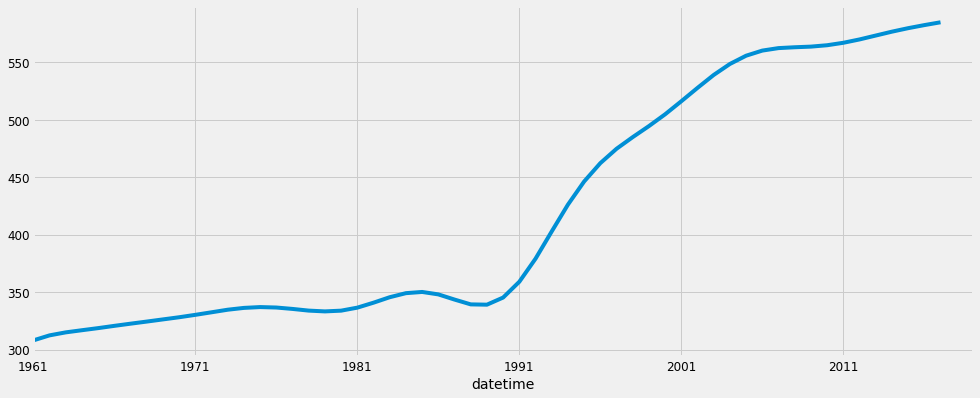

In [333]:
df_pop['Aruba'].plot(figsize=(15,6));
df_pop.shape

In [334]:
df_lan.head()

,Entity,Code,Year,Built-up Area (hectares),Grazing (hectares),Cropland (hectares)
0,Africa,NaN,-10000,1,0.0,0.000
1,Africa,NaN,-9000,2,0.0,0.000
2,Africa,NaN,-8000,4,0.0,0.000
3,Africa,NaN,-7000,7,0.0,7711.773
4,Africa,NaN,-6000,14,0.0,164918.400


In [335]:
df_dis = pd.read_csv('natural-disasters-by-type.csv')
df_air = pd.read_csv('PM25-air-pollution_ourworldindata.csv')
df_carb = pd.read_csv('SYB60_T25_Carbon Dioxide Emission Estimates.csv')
df_for = pd.read_csv('forest-area-as-share-of-land-area_ourworldindata_ByCountry.csv')

df_dis.shape, df_air.shape, df_carb.shape, df_for.shape

((828, 4), (2640, 4), (3309, 7), (1335, 4))

In [336]:
# Wont be using df_dis due to data not being complete
df_dis.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [337]:
df_air.head(12)

,Entity,Code,Year,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (micrograms per cubic meter)"
0,Afghanistan,AFG,1990,60.936690
1,Afghanistan,AFG,1995,56.136628
2,Afghanistan,AFG,2000,56.092028
3,Afghanistan,AFG,2005,43.234032
4,Afghanistan,AFG,2010,46.536809
5,Afghanistan,AFG,2011,50.483960
6,Afghanistan,AFG,2012,50.653945
7,Afghanistan,AFG,2013,50.968831
8,Afghanistan,AFG,2014,49.036091
9,Afghanistan,AFG,2015,62.080234


In [338]:
air = 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (micrograms per cubic meter)'

years = {'Entity':df_air.loc[df_air['Year']==1990].Entity.values, '1990': df_air.loc[df_air['Year'] == 1990][air].values,
        '1995': df_air.loc[df_air['Year'] == 1995][air].values, '2000': df_air.loc[df_air['Year'] == 2000][air].values,
        '2005': df_air.loc[df_air['Year'] == 2005][air].values,'2010': df_air.loc[df_air['Year'] == 2010][air].values,
        '2011': df_air.loc[df_air['Year'] == 2011][air].values,'2012': df_air.loc[df_air['Year'] == 2012][air].values,
        '2013': df_air.loc[df_air['Year'] == 2013][air].values,'2014': df_air.loc[df_air['Year'] == 2014][air].values,
        '2015': df_air.loc[df_air['Year'] == 2015][air].values,'2016': df_air.loc[df_air['Year'] == 2016][air].values}

df_air2 = pd.DataFrame(years)
df_air2.head()

,Entity,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,60.936690,56.136628,56.092028,43.234032,46.536809,50.483960,50.653945,50.968831,49.036091,62.080234,62.854857
1,Albania,17.796006,15.072604,14.320845,12.155814,15.335690,14.646135,14.562992,15.635917,16.748862,14.736548,14.634008
2,Algeria,34.023754,33.398080,32.211591,28.434431,26.709349,27.497075,28.209439,31.009854,33.080627,37.035728,37.230956
3,American Samoa,4.310769,4.295557,4.344943,4.303133,3.368691,3.255184,3.377271,3.457885,3.634140,3.790379,3.763412
4,Andorra,11.576245,11.363996,11.059773,11.219134,11.115808,11.230666,11.254432,10.942684,10.667695,10.908934,10.879472


In [339]:
df_air2 = df_air2.T

In [340]:
# Making header countries, which was on the first row
new_header = df_air2.iloc[0]
df_air2 = df_air2[1:]
df_air2.columns = new_header
df_air2.head()

# Making the index the datetime
df_air2 = df_air2.reset_index()
df_air2.rename(index=str, columns={'index':'datetime'},inplace=True)
df_air2 = df_air2.set_index('datetime')



df_air2.head()

Entity,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Caribbean small states,Central African Republic,Central Europe and the Baltics,Chad,Chile,China,Colombia,Comoros,Congo,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czech Republic,Democratic Republic of Congo,Denmark,Djibouti,Dominica,Dominican Republic,Early-demographic dividend,East Asia & Pacific,East Asia & Pacific (IDA & IBRD),East Asia & Pacific (excluding high income),Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Euro area,Europe & Central Asia,Europe & Central Asia (IDA & IBRD),Europe & Central Asia (excluding high income),European Union,Fiji,Finland,Fragile and conflict affected situations,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Greenland,Grenada,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Heavily indebted poor countries (HIPC),High income,Honduras,Hungary,IBRD only,IDA & IBRD total,IDA blend,IDA only,IDA total,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Laos,Late-demographic dividend,Latin America & Caribbean,Latin America & Caribbean (IDA & IBRD),Latin America & Caribbean (excluding high income),Latvia,Least developed countries: UN classification,Lebanon,Lesotho,Liberia,Libya,Lithuania,Low & middle income,Low income,Lower middle income,Luxembourg,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Micronesia (country),Middle East & North Africa,Middle East & North Africa (IDA & IBRD),Middle East & North Africa (excluding high income),Middle income,Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North America,North Korea,Northern Mariana Islands,Norway,OECD members,Oman,Other small states,Pacific island small states,Pakistan,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Post-demographic dividend,Pre-demographic dividend,Puerto Rico,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,Samoa,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Small states,Solomon Islands,Somalia,South Africa,South Asia,South Asia (IDA & IBRD),South Korea,South Sudan,Spain,Sri Lanka,Sub-Saharan Africa,Sub-Saharan Africa (IDA & IBRD),Sub-Saharan Africa (excluding high income),Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Tanzania,Thailand,Timor,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Upper middle income,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,World,Yemen,Zambia,Zimbabwe
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990,60.9367,17.796,34.0238,4.31077,11.5762,36.8148,17.2755,53.1923,15.9126,20.7322,6.7171,19.2688,26.7457,19.4704,62.5918,63.8724,20.7024,33.4391,19.8198,29.3979,61.6119,12.0921,40.5545,27.8671,46.6338,21.6726,14.7814,5.88817,45.2667,67.7105,46.4565,24.8618,105.812,7.91596,52.8203,21.7026,48.9379,38.3824,64.9129,20.6254,48.4839,21.256,20.8562,52.2665,21.371,33.7697,24.8318,22.8417,15.6528,37.1346,48.1064,12.8554,46.4775,17.8224,20.7826,48.4169,38.1743,41.1914,41.0565,17.4888,75.7921,39.3884,46.8606,44.4936,11.701,36.018,16.3204,23.9382,30.8883,29.5056,20.5777,8.63634,7.83732,43.9018,14.1615,39.8752,66.3007,18.4506,17.4502,38.2625,13.5261,6.15314,19.8821,8.1541,35.3811,30.6728,42.0139,26.1264,30.945,45.3882,17.6804,35.645

In [341]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_air2.head()

Entity,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Caribbean small states,Central African Republic,Central Europe and the Baltics,Chad,Chile,China,Colombia,Comoros,Congo,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czech Republic,Democratic Republic of Congo,Denmark,Djibouti,Dominica,Dominican Republic,Early-demographic dividend,East Asia & Pacific,East Asia & Pacific (IDA & IBRD),East Asia & Pacific (excluding high income),Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Euro area,Europe & Central Asia,Europe & Central Asia (IDA & IBRD),Europe & Central Asia (excluding high income),European Union,Fiji,Finland,Fragile and conflict affected situations,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Greenland,Grenada,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Heavily indebted poor countries (HIPC),High income,Honduras,Hungary,IBRD only,IDA & IBRD total,IDA blend,IDA only,IDA total,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Laos,Late-demographic dividend,Latin America & Caribbean,Latin America & Caribbean (IDA & IBRD),Latin America & Caribbean (excluding high income),Latvia,Least developed countries: UN classification,Lebanon,Lesotho,Liberia,Libya,Lithuania,Low & middle income,Low income,Lower middle income,Luxembourg,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Micronesia (country),Middle East & North Africa,Middle East & North Africa (IDA & IBRD),Middle East & North Africa (excluding high income),Middle income,Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North America,North Korea,Northern Mariana Islands,Norway,OECD members,Oman,Other small states,Pacific island small states,Pakistan,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Post-demographic dividend,Pre-demographic dividend,Puerto Rico,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,Samoa,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Small states,Solomon Islands,Somalia,South Africa,South Asia,South Asia (IDA & IBRD),South Korea,South Sudan,Spain,Sri Lanka,Sub-Saharan Africa,Sub-Saharan Africa (IDA & IBRD),Sub-Saharan Africa (excluding high income),Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Tanzania,Thailand,Timor,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Upper middle income,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,World,Yemen,Zambia,Zimbabwe
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990,60.9367,17.796,34.0238,4.31077,11.5762,36.8148,17.2755,53.1923,15.9126,20.7322,6.7171,19.2688,26.7457,19.4704,62.5918,63.8724,20.7024,33.4391,19.8198,29.3979,61.6119,12.0921,40.5545,27.8671,46.6338,21.6726,14.7814,5.88817,45.2667,67.7105,46.4565,24.8618,105.812,7.91596,52.8203,21.7026,48.9379,38.3824,64.9129,20.6254,48.4839,21.256,20.8562,52.2665,21.371,33.7697,24.8318,22.8417,15.6528,37.1346,48.1064,12.8554,46.4775,17.8224,20.7826,48.4169,38.1743,41.1914,41.0565,17.4888,75.7921,39.3884,46.8606,44.4936,11.701,36.018,16.3204,23.9382,30.8883,29.5056,20.5777,8.63634,7.83732,43.9018,14.1615,39.8752,66.3007,18.4506,17.4502,38.2625,13.5261,6.15314,19.8821,8.1541,35.3811,30.6728,42.0139,26.1264,30.945,45.3882,17.6804,35.645

In [342]:
#df_carb = df_carb[1:]
df_carb = df_carb[df_carb['Unnamed: 3'] == 'Emissions (thousand metric tons of carbon dioxide)']

In [343]:
df_carb.loc[df_carb['Unnamed: 2']=='1975'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '1985'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '1995'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '2005'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '2010'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '2012'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '2013'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '2014'].shape

((175, 7),
 (177, 7),
 (213, 7),
 (215, 7),
 (217, 7),
 (220, 7),
 (220, 7),
 (220, 7))

In [344]:
list(set(df_carb.loc[df_carb['Unnamed: 2'] == '1995']['CO2 emission estimates'].values) - set(df_carb.loc[df_carb['Unnamed: 2'] == '2014']['CO2 emission estimates'].values))

['Serbia and Monten. [former]',
 'Netherlands Antilles [former]',
 'Sudan [former]']

In [345]:
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Timor-Leste']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Wallis and Futuna Islands']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Montenegro']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Sint Maarten (Dutch part)']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Bonaire, St. Eustatius & Saba']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Curaçao']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'South Sudan']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Liechtenstein']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Serbia']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Liechtenstein']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Serbia']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Sudan']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Sudan [former]']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Serbia and Monten. [former]']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Netherlands Antilles [former]']



In [346]:
col = 'Unnamed: 4'

years_carb = {'Countries':df_carb.loc[df_carb['Unnamed: 2']=='1995']['CO2 emission estimates'].values, '1995': df_carb.loc[df_carb['Unnamed: 2'] == '1995'][col].values,
        '2005': df_carb.loc[df_carb['Unnamed: 2'] == '2005'][col].values,'2010': df_carb.loc[df_carb['Unnamed: 2'] == '2010'][col].values,
        '2012': df_carb.loc[df_carb['Unnamed: 2'] == '2012'][col].values,'2013': df_carb.loc[df_carb['Unnamed: 2'] == '2013'][col].values,
        '2014': df_carb.loc[df_carb['Unnamed: 2'] == '2014'][col].values}

df_carb2 = pd.DataFrame(years_carb)

df_carb2.head()

,Countries,1995,2005,2010,2012,2013,2014
0,"Total, all countries or areas","23,120,435","29,490,014","33,472,376","35,470,891","35,837,591","36,138,285"
1,Afghanistan,"1,243","1,327","8,463","10,755","10,015","9,809"
2,Albania,"2,087","4,254","4,598","4,910","5,064","5,717"
3,Algeria,"95,294","107,278","119,178","129,988","134,465","145,400"
4,Andorra,425,576,517,488,477,462


In [347]:
df_carb2 = df_carb2.T

In [348]:
# Making header countries, which was on the first row
new_header = df_carb2.iloc[0]
df_carb2 = df_carb2[1:]
df_carb2.columns = new_header
df_carb2.head()

# Making the index the datetime
df_carb2 = df_carb2.reset_index()
df_carb2.rename(index=str, columns={'index':'datetime'},inplace=True)
df_carb2 = df_carb2.set_index('datetime')



df_carb2.head()

Countries,"Total, all countries or areas",Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia (Plurin. State of),Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Cayman Islands,Central African Republic,Chad,Chile,China,"China, Hong Kong SAR","China, Macao SAR",Colombia,Comoros,Congo,Cook Islands,Costa Rica,Côte d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Dem. People's Rep. Korea,Dem. Rep. of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Falkland Islands (Malvinas),Faroe Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Lao People's Dem. Rep.,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Martinique,Mauritania,Mauritius,Mexico,Micronesia (Fed. States of),Mongolia,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Republic of Moldova,Réunion,Romania,Russian Federation,Rwanda,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Pierre and Miquelon,Saint Vincent & Grenadines,Samoa,Sao Tome and Principe,Saudi Arabia,Senegal,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,Spain,Sri Lanka,State of Palestine,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,TFYR of Macedonia,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Rep. of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Boliv. Rep. of),Viet Nam,Yemen,Zambia,Zimbabwe
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995,"23,120,435","1,243","2,087","95,294",425,"10,975",66,275,"127,964","3,410","1,668","281,860","59,783","33,333","1,683","14,818","22,816",829,"60,773","112,328",378,"1,327",532,249,"9,850","3,429","3,047","258,347",84,"4,789","58,005",627,238,121,"1,551","4,228","467,638",363,235,110,"41,745","3,320,285","31,470","1,232","59,614",73,"1,566",40,"4,866","6,619","16,986","25,709","5,383","123,831","82,911","2,123","57,172",304,81,"15,885","22,842","95,723","5,027",128,935,"17,521","2,563",44,572,763,"52,713","349,161",583,429,"4,624",198,"2,303","864,110","5,277",275,"78,782",502,150,"1,463","7,165","1,291",183,"1,463",902,"3,880","60,370","1,947","811,562","224,941","272,942","74,348","32,970","51,100","430,484","9,179","1,183,447","13,557","169,166","7,554",29,"54,822","4,529",348,"9,443","13,579","1,709",326,"46,021","16,204","8,317","1,265",920,"121,132",249,469,"2,123",66,"1,639","1,074","1,830","332,817",106,"7,921",33,"30,374","1,115","6,960","1,632",106,"2,035","178,634","2,076","27,132","2,780",810,"35,841",7,"33,439","15,896","84,484",235,"2,985","2,061","3,964","23,883","60,711","344,214","51,870","31,789","374,771","11,192","1,764","126,049","1,631,474",462,11,128,312,70,128,117,48,"235,161","3,495",198,400,"42,174","42,115","14,404",143,590,"362,259","241,611","5,904",946,"2,065",455,"55,155","39,226","41,664","2,450","161,154","10,840",953,95,"17,022","15,735","171,975","34,000",48,7,939,"445,944","70,641","538,118","3,553"

In [349]:
# SO FAR WE HAVE THESE DATASETS:

df.shape, df_pop.shape, df_air2.shape, df_carb2.shape

((22, 177), (59, 264), (11, 240), (6, 210))

In [350]:
df_for.reset_index().head(7)

,index,Entity,Code,Year,15.1.1 - Forest area as a proportion of total land area - AG_LND_FRST - Percent (%)
0,0,Afghanistan,AFG,1990,2.07
1,1,Afghanistan,AFG,2000,2.07
2,2,Afghanistan,AFG,2005,2.07
3,3,Afghanistan,AFG,2010,2.07
4,4,Afghanistan,AFG,2015,2.07
5,5,Albania,ALB,1990,28.79
6,6,Albania,ALB,2000,28.08


In [351]:
col2 = '15.1.1 - Forest area as a proportion of total land area - AG_LND_FRST - Percent (%)'

years_for = {'Country':df_for.loc[df_for['Year']==1990]['Entity'].values, '1990': df_for.loc[df_for['Year'] == 1990][col2].values,
        '2000': df_for.loc[df_for['Year'] == 2000][col2].values,'2005': df_for.loc[df_for['Year'] == 2005][col2].values,
        '2010': df_for.loc[df_for['Year'] == 2010][col2].values,'2015': df_for.loc[df_for['Year'] == 2015][col2].values}

df_for2 = pd.DataFrame(years_for)

df_for2.head()

,Country,1990,2000,2005,2010,2015
0,Afghanistan,2.07,2.07,2.07,2.07,2.07
1,Albania,28.79,28.08,28.55,28.33,28.16
2,Algeria,0.70,0.66,0.64,0.81,0.82
3,American Samoa,91.94,90.25,89.41,88.56,87.72
4,Andorra,34.04,34.04,34.04,34.04,34.04


In [352]:
df_for2 = df_for2.T

In [353]:
# Making header countries, which was on the first row
new_header = df_for2.iloc[0]
df_for2 = df_for2[1:]
df_for2.columns = new_header
df_for2.head()

# Making the index the datetime
df_for2 = df_for2.reset_index()
df_for2.rename(index=str, columns={'index':'datetime'},inplace=True)
df_for2 = df_for2.set_index('datetime')



df_for2.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Australia and New Zealand,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Caribbean,Cayman Islands,Central African Republic,Central America,Central Asia,Central and Southern Asia,Chad,Chile,China,Colombia,Comoros,Congo,Cook Islands,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czech Republic,Democratic Republic of Congo,Denmark,Djibouti,Dominica,Dominican Republic,Eastern Africa,Eastern Asia,Eastern Europe,Eastern and South-Eastern Asia,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Europe,Europe and Northern America,Faeroe Islands,Falkland Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guadeloupe,Guam,Guatemala,Guernsey,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jersey,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Landlocked developing countries,Laos,Latin America and the Caribbean,Latvia,Least developed countries,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Martinique,Mauritania,Mauritius,Mayotte,Melanesia,Mexico,Micronesia (country),Micronesia (region),Middle Africa,Moldova,Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,Norfolk Island,North Korea,Northern Africa,Northern Africa and Western Asia,Northern America,Northern Europe,Northern Mariana Islands,Norway,Oceania,Oceania (excluding Australia and New Zealand),Oman,Pakistan,Palau,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Pitcairn,Poland,Polynesia,Portugal,Puerto Rico,Qatar,Reunion,Romania,Russia,Rwanda,Saint Barthélemy,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Martin (French part),Saint Pierre and Miquelon,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Small island developing States,Solomon Islands,Somalia,South Africa,South America,South Korea,South Sudan,South-Eastern Asia,Southern Africa,Southern Europe,Spain,Sri Lanka,Sub-Saharan Africa,Sudan,Suriname,Svalbard and Jan Mayen Islands,Swaziland,Sweden,Switzerland,Syria,Tajikistan,Tanzania,Thailand,Timor,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Africa,Western Asia,Western Europe,Western Sahara,World,Yemen,Zambia,Zimbabwe
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990,2.07,28.79,0.7,91.94,34.04,48.91,61.11,23.41,12.71,11.88,2.33,16.73,17.39,45.81,10.31,51.45,0.28,11.48,14.65,37.5,22.37,70.85,52.08,20,65.76,57.97,43.33,24.21,65.41,24.73,78.37,30.65,25.03,11.25,73.33,51.44,38.3,14.33,22.27,52.92,36.21,39.46,3,9.45,5.32,20.53,16.67,58.06,26.34,66.55,61.02,50.22,32.14,33.06,19.33,17.43,34.05,70.74,12.8,0.24,66.67,22.87,34.54,18.1,47.14,28.54,58.91,0.04,18.19,66.31,16.05,52.04,13.79,44.91,40.31,0.06,0,52.16,71.98,26.36,99.71,15.03,85.38,44.2,39.61,32.41,37.91,0,25.59,0,49.97,43.56,46.3,44.31,2.56,29.56,78.81,84.63,4.21,72.71,19.73,0.16,21.51,68.98,4.91,1.85,6.75,6.06,6.1,25.8,31.82,68.45,5.22,1.1,1.27,8.3,15,0.19,4.38,18.15,76.45,51.26,

In [354]:
df.shape, df_pop.shape, df_air2.shape, df_carb2.shape, df_for2.shape

((22, 177), (59, 264), (11, 240), (6, 210), (5, 267))

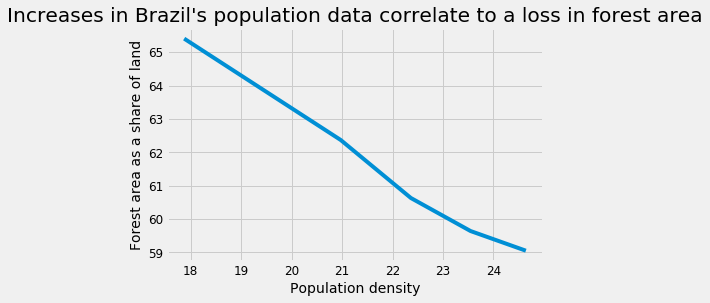

In [396]:
plt.plot(df_pop['Brazil'][['1990','2000','2005','2010','2015']],df_for2['Brazil'])

plt.xlabel('Population density')
plt.ylabel('Forest area as a share of land')
plt.title("Increases in Brazil's population data correlate to a loss in forest area");

In [362]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [382]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(df_for2['Brazil'].astype(float),
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            start_params = [0, 0, 1.]
            results = mod.fit(start_params)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

LinAlgError: Non-positive-definite forecast error covariance matrix encountered at period 1

In [388]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

df_for.head()

,Entity,Code,Year,15.1.1 - Forest area as a proportion of total land area - AG_LND_FRST - Percent (%)
0,Afghanistan,AFG,1990,2.07
1,Afghanistan,AFG,2000,2.07
2,Afghanistan,AFG,2005,2.07
3,Afghanistan,AFG,2010,2.07
4,Afghanistan,AFG,2015,2.07


In [404]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

data = [go.Choropleth(
    locations = df_for.columns,
    z = df_for[df_for['Year'] == '2000']['15.1.1 - Forest area as a proportion of total land area - AG_LND_FRST - Percent (%)'],
    text = df_for.columns,
    colorscale = [
        [0, "rgb(5, 10, 172)"],
        [0.35, "rgb(40, 60, 190)"],
        [0.5, "rgb(70, 100, 245)"],
        [0.6, "rgb(90, 120, 245)"],
        [0.7, "rgb(106, 137, 247)"],
        [1, "rgb(220, 220, 220)"]
    ],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '$',
        title = 'GDP<br>Billions US$'),
)]

layout = go.Layout(
    title = 'Forest area as a share of land'
        ,
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    ),
    annotations = [go.layout.Annotation(
        x = 0.55,
        y = 0.1,
        xref = 'paper',
        yref = 'paper',
        text = 'Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
    )]
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename='world_forestation')

AttributeError: module '_plotly_utils.basevalidators' has no attribute 'TitleValidator'

In [457]:
df_final = pd.read_csv('deforestation_dataset_final.csv')
df_final.head(35)


,Unnamed: 0,country,code_x,year,forest_area_km_x,country_land_area_km_x,code_y,forest_propotion_to_land,country_population,wood_removal,temp_change,code,forest_area_km_y,country_land_area_km_y,total_land_usage
0,0,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,1.374,AFG,13500.0,652860.0,NaN
1,1,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,0.566,AFG,13500.0,652860.0,NaN
2,2,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,-0.196,AFG,13500.0,652860.0,NaN
3,3,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,-0.464,AFG,13500.0,652860.0,NaN
4,4,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,2.661,AFG,13500.0,652860.0,NaN
5,5,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,1.177,AFG,13500.0,652860.0,NaN
6,6,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,0.621,AFG,13500.0,652860.0,NaN
7,7,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,1.359,AFG,13500.0,652860.0,NaN
8,8,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,1.701,AFG,13500.0,652860.0,NaN
9,9,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,0.109,AFG,13500.0,652860.0,NaN


In [464]:
df_final = pd.read_csv('deforestation_dataset_final.csv')
df_final.shape

df_final = df_final.pivot_table(values=['forest_area_km_x', 'country_land_area_km_x',
                                       'forest_propotion_to_land','country_population',
                                       'wood_removal','temp_change','forest_area_km_y', 'total_land_usage'],
                               index='year',
                               columns=['country'])

#df_final = df_final.stack(level='country')
df_final.head(35)

country_land_area_km_x                                             \
country            Afghanistan  Albania    Algeria American Samoa Andorra   
year                                                                        
1990                  652860.0  27400.0  2381740.0          200.0   470.0   
1991                  652860.0  27400.0  2381740.0          200.0   470.0   
1992                  652860.0  27400.0  2381740.0          200.0   470.0   
1993                  652860.0  27400.0  2381740.0          200.0   470.0   
1994                  652860.0  27400.0  2381740.0          200.0   470.0   
1995                  652860.0  27400.0  2381740.0          200.0   470.0   
1996                  652860.0  27400.0  2381740.0          200.0   470.0   
1997                  652860.0  27400.0  2381740.0          200.0   470.0   
1998                  652860.0  27400.0  2381740.0          200.0   470.0   
1999                  652860.0  27400.0  2381740.0          200.0   470.0   
2000                  652860.0  27400.0  2381740.0          200.0   470.0   
2001                  652860.0  27400.0  2381740.0          200.0   470.0   
2002                  652860.0  27400.0  2381740.0          200.0   470.0   
2003                  652860.0  27400.0  2381740.0          200.0   470.0   
2004                  652860.0  27400.0  2381740.0          200.0   470.0   
2005                  652860.0  27400.0  2381740.0          200.0   470.0   
2006                  652860.0  27400.0  2381740.0          200.0   470.0   
2007                  652860.0  27400.0  2381740.0          200.0   470.0   
2008                  652860.0  27400.0  2381740.0          200.0   470.0   
2009                  652860.0  27400.0  2381740.0          200.0   470.0   
2010                  652860.0  27400.0  2381740.0          200.0   470.0   
2011                  652860.0  27400.0  2381740.0          200.0   470.0   
2012                  652860.0  27400.0  2381740.0          200.0   470.0   
2013                  652860.0  27400.0  2381740.0          200.0   470.0   
2014                  652860.0  27400.0  2381740.0          200.0   470.0   
2015                  652860.0  27400.0  2381740.0          200.0   470.0   

                                                                          \
country     Angola Antigua and Barbuda    Arab World  Argentina  Armenia   
year                                                                       
1990     1246700.0               440.0  1.123541e+07  2736690.0  28470.0   
1991     1246700.0               440.0  1.123541e+07  2736690.0  28470.0   
1992     1246700.0               440.0  1.123543e+07  2736690.0  28470.0   
1993     1246700.0               440.0  1.123543e+07  2736690.0  28470.0   
1994     1246700.0               440.0  1.123543e+07  2736690.0  28470.0   
1995     1246700.0               440.0  1.123543e+07  2736690.0  28470.0   
1996     1246700.0               440.0  1.123543e+07  2736690.0  28470.0   
1997     1246700.0               440.0  1.123543e+07  2736690.0  28470.0   
1998     1246700.0               440.0  1.123543e+07  2736690.0  28470.0   
1999     1246700.0               440.0  1.123543e+07  2736690.0  28470.0   
2000     1246700.0               440.0  1.123543e+07  2736690.0  28470.0   
2001     1246700.0               440.0  1.123543e+07  2736690.0  28470.0   
2002     1246700.0               440.0  1.123543e+07  2736690.0  28470.0   
2003     1246700.0               440.0  1.123525e+07  2736690.0  28470.0   
2004     1246700.0               440.0  1.123524e+07  2736690.0  28470.0   
2005     1246700.0               440.0  1.123525e+07  2736690.0  28470.0   
2006     1246700.0               440.0  1.123531e+07  2736690.0  28470.0   
2007     1246700.0               440.0  1.123533e+07  2736690.0  28470.0   
2008     1246700.0               440.0  1.123534e+07  2736690.0  28470.0   
2009     1246700.0               440.0  1.123283e+07  2736690.0  28470.0   
2010     1246700.0        

In [443]:
df_final['forest_area_km_x']['Brazil']


year
1990    5467050.0
1991    5441619.0
1992    5416188.0
1993    5390757.0
1994    5365326.0
1995    5339895.0
1996    5314464.0
1997    5289033.0
1998    5263602.0
1999    5238171.0
2000    5212740.0
2001    5183660.0
2002    5154580.0
2003    5125500.0
2004    5096420.0
2005    5067340.0
2006    5050788.0
2007    5034236.0
2008    5017684.0
2009    5001132.0
2010    4984580.0
2011    4974740.0
2012    4964900.0
2013    4955060.0
2014    4945220.0
2015    4935380.0
Name: Brazil, dtype: float64

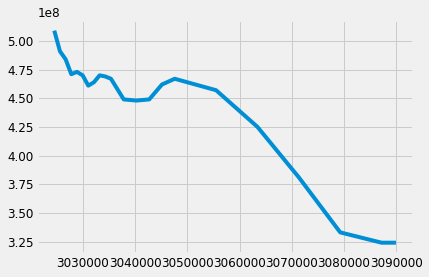

In [479]:
plt.plot(df_final['forest_area_km_y']['United States'],df_final['wood_removal']['United States'])

#plt.plot(df_final['forest_area_km_x']['Brazil']/df_final['country_land_area_km_x']['Brazil'])

#plt.plot(df_final['forest_area_km_x']['Brazil'])


In [445]:
df_final.columns



MultiIndex(levels=[['country_land_area_km_x', 'country_population', 'forest_area_km_x', 'forest_area_km_y', 'forest_propotion_to_land', 'temp_change', 'total_land_usage', 'wood_removal'], ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Cote d'Ivoire', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Domini

In [482]:
# Making list of 

# (Time, wood_removal), (Time, forest_area_km), (forest_area_km, wood_removal)





import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

N = 500
random_x = np.linspace(0, 1, N)
random_y = np.random.randn(N)

# Create a trace
trace = go.Scatter(
    x = df_final['forest_area_km_y']['United States'],
    y = df_final['wood_removal']['United States']
)

data = [trace]

py.iplot(data, filename='basic-line')
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename='world_forestation')


AttributeError: module 'plotly.validators.scatter.marker.colorbar' has no attribute 'BgcolorValidator'